# Scatterplot Over-draw

### Imports and Setup

In [1]:
# Third party libraries
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.colors import ListedColormap
from matplotlib.gridspec import GridSpec
import matplotlib_inline

import ot
import pandas as pd
import pickle 
from scipy.stats import gaussian_kde
from sklearn.cluster import KMeans
import seaborn as sns

# Local imports
import sets, loss, solver, plot

# Initialize notebook settings
sns.set_theme() # set seaborn theme
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # vector plots
%matplotlib inline
%load_ext autoreload
%autoreload 2

### Load Dataset

In [19]:
# load dataset from csv
openings = pd.read_csv("datasets/chessOpenings.csv", index_col=0)

# apply dictionary for mapping
eco_mapping = {
    'A': 'Flank',
    'B': 'Semi-Open',
    'C': 'Open & French Defense',
    'D': 'Closed & Semi-Closed',
    'E': 'Indian Defenses'
}
openings['ECO'] = openings['ECO'].str[0].map(eco_mapping)

# drop unused columns
dropCols = ["Last Played", "Moves", "moves_list", "move1w", "move1b", "move2b", 
            "move2w", "move3w", "move3b", "move4w", "move4b", "Colour", "Perf Rating", "Avg Player", "Draw %", "Opponent Win %", "White_win%", "Black_win%", "White_odds", "White_Wins", 
            "Black_Wins"]
openings.drop(inplace=True, columns=dropCols)

# create dataset
features = ["Player Win %", "Num Games"]
dataset = sets.Dataset(data=openings, 
                       features=features, 
                       categorical="ECO",
                       bins=10)

# plot scatterplot of dataset
palette = {"Flank": color["green"], 
           "Semi-Open": color["yellow"], 
           "Open & French Defense": color["orange"], 
           "Closed & Semi-Closed": color["blue"], 
           "Indian Defenses": color["darkGreen"]}

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.scatterplot(data = dataset.df, 
        x = features[0], 
        y = features[1], 
        alpha = 0.5,
        hue = "ECO",
        ax = ax,
        s=20,
        palette = palette)

plt.title("Chess Openings");

def emdCategorical(subset, dataset, features, categorical, categories):
    emd_losses = []
    for category in categories:
        subset_data = subset.loc[subset[categorical] == category, features].values
        dataset_data = dataset.loc[dataset[categorical] == category, features].values
        emd_loss = ot.emd2([], [], ot.dist(subset_data, dataset_data))
        emd_losses.append(emd_loss)
    return emd_losses

In [164]:
s = 250

z, timeTotal, loss = approximation.greedySwap(dataset, s=s, objective=objectives.emdOverdrawCategorical)
subset = sets.Subset(dataset, z, length=s)
print(loss)

with open('size=250_obj=emdOverdrawCategorical_k=full.pkl', 'wb') as f:
    pickle.dump(subset, f)

0: 830.3382778416449
1: 814.336921274158
2: 814.336921274158
3: 796.3293199722762
4: 796.3293199722762
5: 786.331130279544
6: 774.3304990470034
7: 774.3304990470034
8: 764.3318853700049
9: 762.3336969503002
10: 752.3347860600632
11: 742.3351878401255
12: 726.3381656553524
13: 722.3391874145701
14: 712.337184337119
15: 706.3403477393875
16: 690.3449155724538
17: 682.3497816549269
18: 668.3478712946024
19: 658.3479066420055
20: 656.3499364207831
21: 654.3536350141558
22: 654.3536350141558
23: 654.3536350141558
24: 640.3528683366419
25: 636.351955353182
26: 636.351955353182
27: 636.351955353182
28: 626.3500770934883
29: 626.3500770934883
30: 618.3498010716612
31: 608.3502065661173
32: 598.3494869062012
33: 592.3506937331431
34: 580.3538667832493
35: 580.3538667832493
36: 580.3538667832493
37: 580.3538667832493
38: 580.3538667832493
39: 568.35764435045
40: 568.35764435045
41: 560.360675510666
42: 556.3605821960258
43: 556.3605821960258
44: 556.3605821960258
45: 550.3629438599996
46: 544.36

(250, 4)


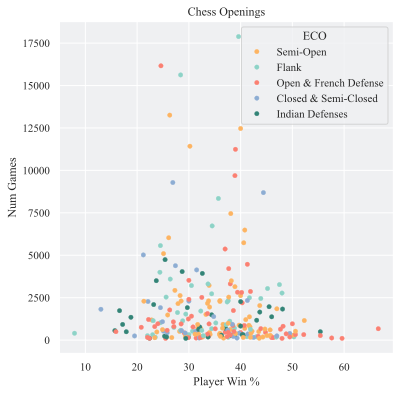

In [128]:
with open('size=250_obj=emdOverall_k=20.pkl', 'rb') as f:
    subset = pickle.load(f)

print(subset.df.shape)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
# ax.set_xticks(np.arange(0, max(dataset.df["Perf Rating"]) + 2*minDistance, minDistance), minor=True)
# ax.set_yticks(np.arange(0, max(dataset.df["Num Games"]) + 2*minDistance, minDistance), minor=True)

ax.grid(which='minor', linewidth='0.45', color='white')
ax.set_title("Chess Openings")

sns.scatterplot(data = subset.df, 
        x = features[0], 
        y = features[1], 
        alpha = 1,
        hue = "ECO",
        ax = ax,
        s = 20,
        palette = palette,
        edgecolor=None);

plt.savefig("chess.pdf", bbox_inches="tight")

In [44]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

num_bins = 40
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))

# List of dataframes
dataframes = [dataset.df, subset.df]

# Calculate histograms for both datasets
histograms_list = [df.groupby('ECO').apply(lambda x: np.histogram2d(x['Num Games'], x['Player Win %'], bins=num_bins)[0]).tolist() for df in dataframes]

# Normalize each histogram by the length of the corresponding dataframe
normalized_histograms_list = [np.array(histograms) / len(df) for histograms, df in zip(histograms_list, dataframes)]

# Flatten the list of normalized histograms and convert to a single array for normalization
all_histograms = np.concatenate(normalized_histograms_list, axis=None)

# Calculate the global min and max values for normalization
vmin = all_histograms.min()
vmax = all_histograms.max()

for i, histograms in enumerate(normalized_histograms_list):
    for j, hist_eco in enumerate(histograms):
        sns.heatmap(hist_eco, 
                    cbar=False,
                    ax=axs[i, j],
                    vmin=vmin,
                    vmax=vmax,
                    cmap="Greens")
        axs[i, j].invert_yaxis()
        axs[i, j].axis('off')

        if j == 0:
            axs[i, j].set_ylabel(["Dataset", "Subset"][i])

plt.savefig("chess.pdf", bbox_inches="tight")


/var/folders/g7/k2wgq3hd4_7crzw88nqrqdv80000gn/T/ipykernel_81514/3471086209.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  histograms_list = [df.groupby('ECO').apply(lambda x: np.histogram2d(x['Num Games'], x['Player Win %'], bins=num_bins)[0]).tolist() for df in dataframes]
/var/folders/g7/k2wgq3hd4_7crzw88nqrqdv80000gn/T/ipykernel_81514/3471086209.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
 

NameError: name 'subset' is not defined

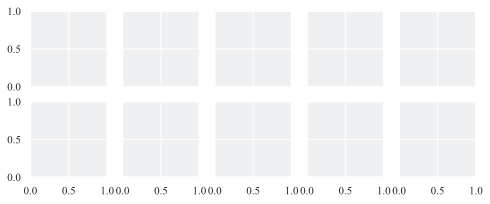

In [17]:
from scipy.stats import gaussian_kde

eco_categories = dataset.df['ECO'].unique()

fig, axs = plt.subplots(2, 5, figsize=(8, 3), sharex=True, sharey=True)
x_min, x_max = dataset.df['Player Win %'].min(), dataset.df['Player Win %'].max()
y_min, y_max = dataset.df['Num Games'].min(), dataset.df['Num Games'].max()
x_range = np.linspace(x_min, x_max, 50)
y_range = np.linspace(y_min, y_max, 50)
X, Y = np.meshgrid(x_range, y_range)
positions = np.vstack([X.ravel(), Y.ravel()])

for i, eco_category in enumerate(eco_categories):
    for j, data in enumerate([dataset.df, subset.df]):
        category = data[data['ECO'] == eco_category]

        smoothness = 0.5
        dataKDE = gaussian_kde(np.vstack([category['Player Win %'], category['Num Games']]), smoothness)
        Z = np.reshape(dataKDE(positions).T, X.shape)

        axs[j, i].contourf(X, Y, Z, cmap='Blues', levels=12)

        if j == 0:
            axs[j, i].set_title(f'{eco_category}')

AttributeError: 'Dataset' object has no attribute 'kde_results'

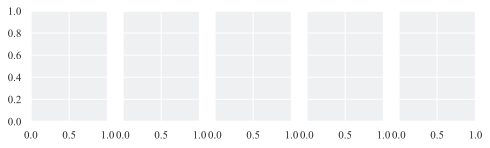

In [18]:
from scipy.stats import gaussian_kde

fig, axs = plt.subplots(1, 5, figsize=(8, 2), sharex=True, sharey=True)
x_min, x_max = dataset.df['Player Win %'].min(), dataset.df['Player Win %'].max()
y_min, y_max = dataset.df['Num Games'].min(), dataset.df['Num Games'].max()
x_range = np.linspace(x_min, x_max, 50)
y_range = np.linspace(y_min, y_max, 50)
X, Y = np.meshgrid(x_range, y_range)

for i, kde in enumerate(dataset.kde_results):
    Z = np.reshape(kde.T, X.shape)
    axs[i].contourf(X, Y, Z, cmap='Blues', levels=12)

In [40]:
titleSize = 16
labelSize = 14
smoothness = 0.45
levels = 5

xlimScatter = [0, 80]
ylimScatter = [-300, 23000]
ylimKDE = [0, 12500]
xlimKDE = [0, 80]

fullScatterSize = 15
smallScatterSize = 3.5

nrows=20
ncols=33

height_ratios = np.ones(nrows)
height_ratios[9] = 0.5
height_ratios[19] = 2

width_ratios = np.ones(ncols)
width_ratios[10] = 0.7
width_ratios[21] = 0.5
width_ratios[27] = 0.3

fig = plt.figure(figsize=(18, 8))
grid = GridSpec(nrows=nrows, 
                ncols=ncols, 
                figure=fig, 
                height_ratios=height_ratios, 
                width_ratios=width_ratios)

ax1 = fig.add_subplot(grid[:14, 0:10])
ax2 = fig.add_subplot(grid[:14, 11:21])

ax3 = fig.add_subplot(grid[16:, 0:2])
ax4 = fig.add_subplot(grid[16:, 2:4])
ax5 = fig.add_subplot(grid[16:, 4:6])
ax6 = fig.add_subplot(grid[16:, 6:8])
ax7 = fig.add_subplot(grid[16:, 8:10])

ax8 = fig.add_subplot(grid[16:, 11:13])
ax9 = fig.add_subplot(grid[16:, 13:15])
ax10 = fig.add_subplot(grid[16:, 15:17])
ax11 = fig.add_subplot(grid[16:, 17:19])
ax12 = fig.add_subplot(grid[16:, 19:21])

ax13 = fig.add_subplot(grid[:6, 22:27])
ax14 = fig.add_subplot(grid[:6, 28:])
ax15 = fig.add_subplot(grid[10:16, 22:27])
ax16 = fig.add_subplot(grid[10:16, 28:])

ax17 = fig.add_subplot(grid[6:8, 22])
ax18 = fig.add_subplot(grid[6:8, 23])
ax19 = fig.add_subplot(grid[6:8, 24])
ax20 = fig.add_subplot(grid[6:8, 25])
ax21 = fig.add_subplot(grid[6:8, 26])

ax22 = fig.add_subplot(grid[6:8, 28])
ax23 = fig.add_subplot(grid[6:8, 29])
ax24 = fig.add_subplot(grid[6:8, 30])
ax25 = fig.add_subplot(grid[6:8, 31])
ax26 = fig.add_subplot(grid[6:8, 32])

ax27 = fig.add_subplot(grid[16:18, 22])
ax28 = fig.add_subplot(grid[16:18, 23])
ax29 = fig.add_subplot(grid[16:18, 24])
ax30 = fig.add_subplot(grid[16:18, 25])
ax31 = fig.add_subplot(grid[16:18, 26])

ax32 = fig.add_subplot(grid[16:18, 28])
ax33 = fig.add_subplot(grid[16:18, 29])
ax34 = fig.add_subplot(grid[16:18, 30])
ax35 = fig.add_subplot(grid[16:18, 31])
ax36 = fig.add_subplot(grid[16:18, 32])

ax37 = fig.add_subplot(grid[19:, 22:])

fullScatter = sns.scatterplot(data = dataset.df, 
        x = features[0], 
        y = features[1], 
        alpha = 0.6,
        hue = "ECO",
        ax = ax1,
        s=fullScatterSize,
        palette = palette)

ax1.set_title("Chess Openings", fontsize=titleSize)
ax1.set_xlabel("Win Rate", fontsize=labelSize)
ax1.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x)}%'))
ax1.set_ylabel("Frequency Played", fontsize=labelSize)

handles, labels = ax1.get_legend_handles_labels()
modified_labels = [label.replace("&", "&\n") for label in labels]
ax1.legend(handles, modified_labels, fontsize=11, title="ECO Categories")
ax1.set_xlim(xlimScatter)
ax1.set_ylim(ylimScatter)

with open('size=250_obj=emdOverdrawCategorical_k=full.pkl', 'rb') as f:
    categoricalOverdrawSubset = pickle.load(f)

subsetScatter = sns.scatterplot(data = categoricalOverdrawSubset.df, 
        x = features[0], 
        y = features[1], 
        alpha = 1,
        hue = "ECO",
        ax = ax2,
        s=fullScatterSize,
        palette = palette,
        edgecolor = None)

ax2.sharey(ax1)
ax2.set_ylabel(None)
ax2.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
ax2.set_title("Subset of Chess Openings\nCategorical Distribution without Overdraw", fontsize=titleSize)
ax2.set_xlabel("Win Rate", fontsize=labelSize)
ax2.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x)}%'))
ax2.set_ylabel(None)
subsetScatter.legend_.set_title("ECO Categories")
ax2.get_legend().remove()
ax2.set_xlim(xlimScatter)
ax2.set_ylim(ylimScatter)

eco_categories = dataset.df['ECO'].unique()
x_min, x_max = dataset.df['Player Win %'].min(), dataset.df['Player Win %'].max()
y_min, y_max = dataset.df['Num Games'].min(), dataset.df['Num Games'].max()
x_range = np.linspace(x_min, x_max, 50)
y_range = np.linspace(y_min, y_max, 50)
X, Y = np.meshgrid(x_range, y_range)
positions = np.vstack([X.ravel(), Y.ravel()])

axs = [[ax3, ax4, ax5, ax6, ax7], [ax8, ax9, ax10, ax11, ax12]]
for i, eco_category in enumerate(eco_categories):
    for j, data in enumerate([dataset.df, categoricalOverdrawSubset.df]):
        category = data[data['ECO'] == eco_category]

        dataKDE = gaussian_kde(np.vstack([category['Player Win %'], category['Num Games']]), smoothness)
        Z = np.reshape(dataKDE(positions).T, X.shape)

        color = palette[eco_category]
        light_palette = sns.light_palette(color, n_colors=levels)
        colormap = ListedColormap(light_palette)

        axs[j][i].set_facecolor(light_palette[0])
        axs[j][i].contourf(X, Y, Z, levels=levels-1, cmap=colormap)
        axs[j][i].set_xticks([])
        axs[j][i].set_yticks([])
        axs[j][i].set_xlim(xlimKDE)
        axs[j][i].set_ylim(ylimKDE)

        axs[j][i].set_xlabel(f'{eco_category.replace("&", "&\n")}', fontsize=8)

ax13.set_title("Subset of Chess Openings:\nRandom Subset")
randomSubset = dataset.df.sample(250)
sns.scatterplot(data = randomSubset, 
        x = features[0], 
        y = features[1], 
        alpha = 0.6,
        hue = "ECO",
        ax = ax13,
        s=smallScatterSize,
        palette = palette,
        edgecolor = None,
        legend=None)

ax13.set_xticklabels([])
ax13.set_yticklabels([])
ax13.set_xlim(xlimScatter)
ax13.set_ylim(ylimScatter)
ax13.set_xlabel(None)
ax13.set_ylabel(None)

axs = [ax17, ax18, ax19, ax20, ax21]
for i, eco_category in enumerate(eco_categories):
        category = randomSubset[randomSubset['ECO'] == eco_category]

        dataKDE = gaussian_kde(np.vstack([category['Player Win %'], category['Num Games']]), smoothness)
        Z = np.reshape(dataKDE(positions).T, X.shape)

        color = palette[eco_category]
        light_palette = sns.light_palette(color, n_colors=levels)
        colormap = ListedColormap(light_palette)

        axs[i].set_facecolor(light_palette[0])
        axs[i].contourf(X, Y, Z, levels=levels-1, cmap=colormap)
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        axs[i].set_xlim(xlimKDE)
        axs[i].set_ylim(ylimKDE)

ax14.set_title("Subset of Chess Openings:\nWithout Overdraw")

with open('subsetSize=250_Overdraw.pkl', 'rb') as f:
    overdrawSubset = pickle.load(f)

sns.scatterplot(data = overdrawSubset.df, 
        x = features[0], 
        y = features[1], 
        alpha = 1,
        hue = "ECO",
        ax = ax14,
        s=smallScatterSize,
        palette = palette,
        edgecolor = None,
        legend=None)

ax14.set_xticklabels([])
ax14.set_yticklabels([])
ax14.set_xlim(xlimScatter)
ax14.set_ylim(ylimScatter)
ax14.set_ylabel(None)
ax14.set_xlabel(None)

axs = [ax22, ax23, ax24, ax25, ax26]
for i, eco_category in enumerate(eco_categories):
        category = overdrawSubset.df[overdrawSubset.df['ECO'] == eco_category]

        dataKDE = gaussian_kde(np.vstack([category['Player Win %'], category['Num Games']]), smoothness)
        Z = np.reshape(dataKDE(positions).T, X.shape)

        color = palette[eco_category]
        light_palette = sns.light_palette(color, n_colors=levels)
        colormap = ListedColormap(light_palette)

        axs[i].set_facecolor(light_palette[0])
        axs[i].contourf(X, Y, Z, levels=levels-1, cmap=colormap)
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        axs[i].set_xlim(xlimKDE)
        axs[i].set_ylim(ylimKDE)

ax15.set_title("Subset of Chess Openings:\nOverall Distribution")
with open('size=250_obj=emdOverall_k=full.pkl', 'rb') as f:
    overallSubset = pickle.load(f)

sns.scatterplot(data = overallSubset.df, 
        x = features[0], 
        y = features[1], 
        alpha = 1,
        ax = ax15,
        s=smallScatterSize,
        hue=0,
        palette=palette,
        edgecolor = None,
        legend=None)

ax15.set_xticklabels([])
ax15.set_yticklabels([])
ax15.set_xlim(xlimScatter)
ax15.set_ylim(ylimScatter)
ax15.set_ylabel(None)
ax15.set_xlabel(None)

axs = [ax27, ax28, ax29, ax30, ax31]
for i, eco_category in enumerate(eco_categories):
        category = overallSubset.df[overallSubset.df['ECO'] == eco_category]

        dataKDE = gaussian_kde(np.vstack([category['Player Win %'], category['Num Games']]), smoothness)
        Z = np.reshape(dataKDE(positions).T, X.shape)

        color = palette[eco_category]
        light_palette = sns.light_palette(color, n_colors=levels)
        colormap = ListedColormap(light_palette)

        axs[i].set_facecolor(light_palette[0])
        axs[i].contourf(X, Y, Z, levels=levels-1, cmap=colormap)
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        axs[i].set_xlim(xlimKDE)
        axs[i].set_ylim(ylimKDE)

ax16.set_title("Subset of Chess Openings:\nCategorical Distribution")
with open('size=250_obj=emdCategorical_k=full.pkl', 'rb') as f:
    categoricalSubset = pickle.load(f)

sns.scatterplot(data = categoricalSubset.df, 
        x = features[0], 
        y = features[1], 
        alpha = 0.6,
        hue = "ECO",
        ax = ax16,
        s=smallScatterSize,
        palette = palette,
        edgecolor = None,
        legend=None)

ax16.set_yticklabels([])
ax16.set_xticklabels([])
ax16.set_xlim(xlimScatter)
ax16.set_ylim(ylimScatter)
ax16.set_ylabel(None)
ax16.set_xlabel(None)

axs = [ax32, ax33, ax34, ax35, ax36]
for i, eco_category in enumerate(eco_categories):
        category = categoricalSubset.df[categoricalSubset.df['ECO'] == eco_category]

        dataKDE = gaussian_kde(np.vstack([category['Player Win %'], category['Num Games']]), smoothness)
        Z = np.reshape(dataKDE(positions).T, X.shape)

        color = palette[eco_category]
        light_palette = sns.light_palette(color, n_colors=levels)
        colormap = ListedColormap(light_palette)

        axs[i].set_facecolor(light_palette[0])
        axs[i].contourf(X, Y, Z, levels=levels-1, cmap=colormap)
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        axs[i].set_xlim(xlimKDE)
        axs[i].set_ylim(ylimKDE)

subset_list = [categoricalOverdrawSubset.df, randomSubset, overdrawSubset.df, overallSubset.df, categoricalSubset.df]
subset_names = ["Categorical Distribution\nwithout Overdraw", "Random", "Without\nOverdraw", "Overall\nDistribution", "Categorical\nDistribution"]

emd_data = {'Subset': [], 'Category': [], 'EMD': []}
for i, subset in enumerate(subset_list):
    emd_losses = emdCategorical(subset, dataset.df, dataset.features, dataset.categorical, dataset.categories)
    for j, category in enumerate(dataset.categories):
        emd_data['Subset'].append(subset_names[i])
        emd_data['Category'].append(category)
        emd_data['EMD'].append(emd_losses[j])

# Create DataFrame from the emd_data dictionary
emd_df = pd.DataFrame(emd_data)

# Plot using Seaborn with the specified palette and ax
sns.barplot(x='Subset', 
            y='EMD', 
            hue='Category', 
            data=emd_df, 
            palette=palette, 
            ax=ax37,
            legend=None,
            linewidth=0)
ax37.set_xlabel(None)
ax37.set_ylabel(None)
ax37.set_title('Earth Mover\'s Distance for Each Subset')
ax37.set_xticks(subset_names)
ax37.set_xticklabels(ax37.get_xticklabels(), fontsize=8)
ax37.set_yticks([0, 2e6, 4e6, 6e6])
ax37.set_yticklabels([])

plt.subplots_adjust(hspace=0.1, wspace=0)
plt.savefig("chess.pdf", bbox_inches="tight", format="pdf")
plt.close(fig)

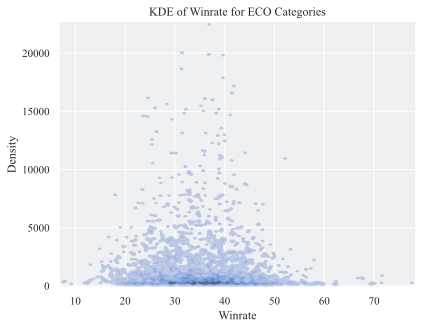

In [68]:
sns.kdeplot(data=dataset.df, x='Player Win %', y='Num Games', fill=True, common_norm=False, bw_adjust=0.1)

plt.title('KDE of Winrate for ECO Categories')
plt.xlabel('Winrate')
plt.ylabel('Density')
plt.show()

In [ ]:

player_win_percentage = dataset.df['Player Win %']
num_games = dataset.df['Num Games']

# Combine the columns into a 2D array
data = np.vstack([player_win_percentage, num_games])

# Calculate Gaussian KDE
kde = gaussian_kde(data, bw_method=0.025)

# Define the range of values for the plot
x_min, x_max = player_win_percentage.min(), player_win_percentage.max()
y_min, y_max = num_games.min(), num_games.max()
x_range = np.linspace(x_min, x_max, 100)
y_range = np.linspace(y_min, y_max, 100)
X, Y = np.meshgrid(x_range, y_range)
positions = np.vstack([X.ravel(), Y.ravel()])

# Evaluate KDE at each point in the grid
Z = np.reshape(kde(positions).T, X.shape)

# Plot the KDE
plt.contourf(X, Y, Z, cmap='Blues')
plt.colorbar(label='Density')
plt.xlabel('Player Win %')
plt.ylabel('Num Games')
plt.title('2D Gaussian KDE')
plt.show()

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10, 5))

sns.kdeplot(x="Player Win %", 
            y="Num Games", 
            data=dataset.df, 
            alpha=0.5,
            fill=True, 
            bw_method=0.35,
            ax = axs[0],
            color=color["green"])

sns.kdeplot(x="Player Win %", 
            y="Num Games", 
            data=subset.df, 
            alpha=1,
            fill=True, 
            bw_method=0.35,
            ax = axs[1],
            color=color["orange"])

In [ ]:
s = 100
minDistance = 0.08

z, timeTotal, loss = approximation.greedySwap(dataset, s=s, objective=objectives.kde)
subset = sets.Subset(dataset, z, length=s)
print(loss)

In [ ]:
print(loss)

In [ ]:

grouped = dataset.df.groupby('ECO')
print(grouped.mean())
# ranges = grouped.agg([lambda x: x.max() - x.min()]).to_numpy()

# print(ranges)

In [ ]:
import chess
import chess.svg
from IPython.display import SVG, display

# Define the moves
moves_notation = ['e4', 'Nf6', 'e5', 'Nd5', 'd4', 'd6', 'Bc4']

# Initialize a chess board
board = chess.Board()

# Apply the moves to the board
for move in moves_notation:
    board.push_san(move)

# Generate SVG
svg = chess.svg.board(board=board)

# Display the SVG
display(SVG(svg))